In [175]:
from nba_py.constants import CURRENT_SEASON
print(CURRENT_SEASON)

2017-18


In [176]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [177]:
from nba_py import player

In [245]:
playerid=player.get_player(first_name='Stephen', last_name='Curry')

In [246]:
season='2017-18'

In [247]:
name=player.PlayerSummary(playerid).info()['DISPLAY_FIRST_LAST'][0]

In [248]:
player.PlayerSummary(playerid).info()

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,...,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER
0,201939,Stephen,Curry,Stephen Curry,"Curry, Stephen",S. Curry,1988-03-14T00:00:00,Davidson,USA,Davidson/USA,...,warriors,Golden State,stephen_curry,2009,2017,N,Y,2009,1,7


In [249]:
player.PlayerSummary(playerid).headline_stats()

,PLAYER_ID,PLAYER_NAME,TimeFrame,PTS,AST,REB,PIE
0,201939,Stephen Curry,2017-18,26.3,6.6,5.1,0.162


In [250]:
pst=player.PlayerShotTracking(playerid, 
                          team_id=0, 
                          measure_type='Base', 
                          per_mode='PerGame', 
                          plus_minus='N', 
                          pace_adjust='N', 
                          rank='N', 
                          league_id='00', 
                          season=season, season_type='Regular Season',
                          po_round='0', outcome='', location='', 
                          month='0', season_segment='', 
                          date_from='', date_to='', 
                          opponent_team_id='0', 
                          vs_conference='', vs_division='', 
                          game_segment='', period='0', 
                          shot_clock_range='', last_n_games='0')

In [251]:
shotsByType=pst.general_shooting().set_index('SHOT_TYPE')

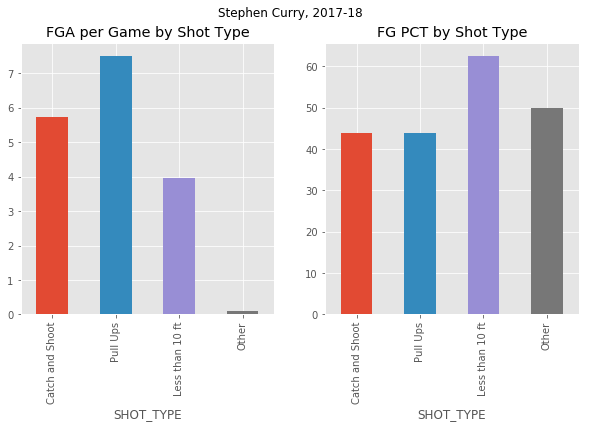

In [252]:
plt.suptitle(name + ', ' + season)
plt.subplot(121)
shotsByType['FGA'].plot(kind='bar', figsize=(10,5),  title='FGA per Game by Shot Type')
plt.subplot(122)
(shotsByType['FG_PCT']*100).plot(kind='bar', figsize=(10,5), title='FG PCT by Shot Type')

In [253]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [254]:
ShotsByTime=pst.touch_time_shooting()

In [255]:
ShotsByTime=ShotsByTime.set_index('TOUCH_TIME_RANGE')

In [256]:
name[0]

'S'

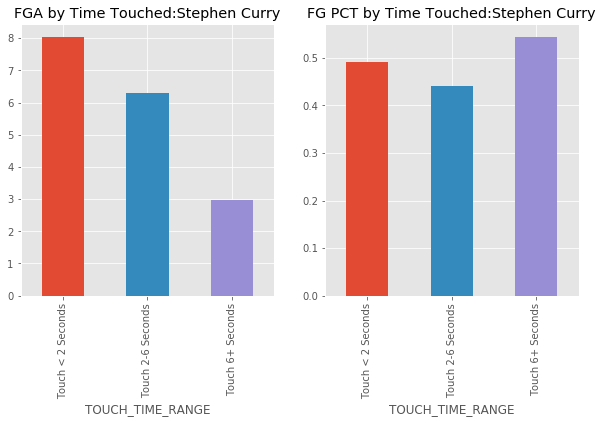

In [257]:
plt.subplot(121)
ShotsByTime['FGA'].plot(kind='bar', figsize=(10,5),  title='FGA by Time Touched:' + name )
plt.subplot(122)
ShotsByTime['FG_PCT'].plot(kind='bar', figsize=(10,5), title='FG PCT by Time Touched:' + name )

In [258]:
ShotsByDefense=pst.closest_defender_shooting().set_index('CLOSE_DEF_DIST_RANGE')

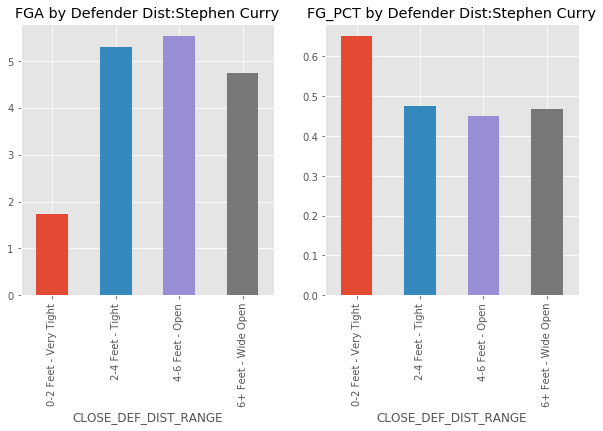

In [263]:
plt.subplot(121)
ShotsByDefense['FGA'].plot(kind='bar', figsize=(10,5),  title='FGA by Defender Dist:' + name )
plt.subplot(122)
ShotsByDefense['FG_PCT'].plot(kind='bar', figsize=(10,5), title='FG_PCT by Defender Dist:' + name )

In [260]:
ShotsByDefense

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,SORT_ORDER,GP,G,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
CLOSE_DEF_DIST_RANGE,,,,,,,,,,,,,,,,,,
0-2 Feet - Very Tight,201939,"Curry, Stephen",1,23,19,0.101,1.13,1.74,0.650,0.688,0.090,1.00,1.57,0.639,0.010,0.13,0.17,0.750
2-4 Feet - Tight,201939,"Curry, Stephen",2,23,23,0.307,2.52,5.30,0.475,0.512,0.211,2.13,3.65,0.583,0.095,0.39,1.65,0.237
4-6 Feet - Open,201939,"Curry, Stephen",3,23,23,0.319,2.48,5.52,0.449,0.587,0.103,0.96,1.78,0.537,0.216,1.52,3.74,0.407
6+ Feet - Wide Open,201939,"Curry, Stephen",4,23,23,0.274,2.22,4.74,0.468,0.633,0.053,0.65,0.91,0.714,0.221,1.57,3.83,0.409


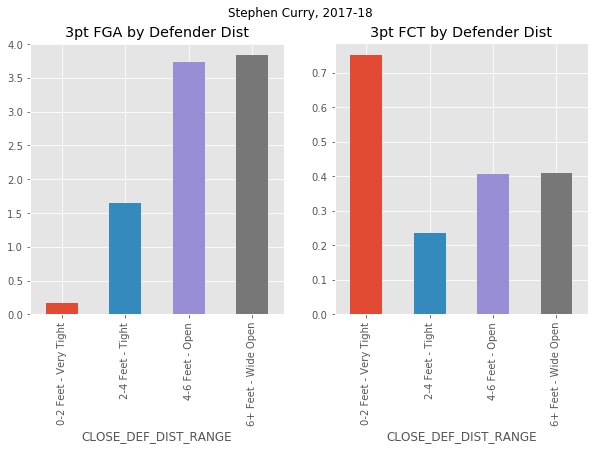

In [265]:
plt.suptitle(name + ', ' + season)
plt.subplot(121)
ShotsByDefense['FG3A'].plot(kind='bar', figsize=(10,5),  title='3pt FGA by Defender Dist')
plt.subplot(122)
ShotsByDefense['FG3_PCT'].plot(kind='bar', figsize=(10,5), title='3pt FCT by Defender Dist')

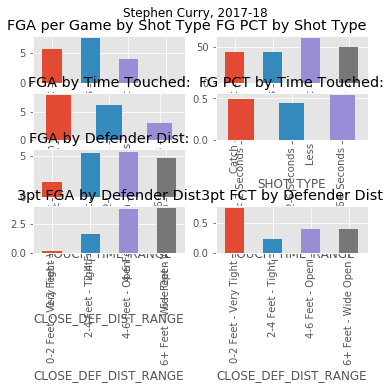

In [277]:
plt.suptitle(name + ', ' + season)
plt.subplot(421)
shotsByType['FGA'].plot(kind='bar', title='FGA per Game by Shot Type')
plt.subplot(422)
(shotsByType['FG_PCT']*100).plot(kind='bar', title='FG PCT by Shot Type')
plt.subplot(423)
ShotsByTime['FGA'].plot(kind='bar', title='FGA by Time Touched')
plt.subplot(424)
ShotsByTime['FG_PCT'].plot(kind='bar', title='FG PCT by Time Touched')
plt.subplot(425)
ShotsByDefense['FGA'].plot(kind='bar', title='FGA by Defender Dist')
plt.subplot(326)
ShotsByDefense['FG_PCT'].plot(kind='bar', title='FG_PCT by Defender Dist')
plt.subplot(427)
ShotsByDefense['FG3A'].plot(kind='bar', title='3pt FGA by Defender Dist')
plt.subplot(428)
ShotsByDefense['FG3_PCT'].plot(kind='bar', title='3pt FCT by Defender Dist')